# import

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Funcions

In [6]:
def graph_img_cat(data_dir):
    """
    Generates a bar chart showing the number of images per category.
    Args:
        data_dir (str): Directory where the category subfolders are located.
    Returns:
        matplotlib.figure.Figure: A figure object showing the number of images per category.
        pd.DataFrame: A DataFrame containing the category names and their respective counts.
    """
    # Ensure the folders within the directory are indeed subfolders
    category_names = [category for category in sorted(os.listdir(data_dir))
                      if os.path.isdir(os.path.join(data_dir, category))]
    img_pr_cat = []
    img_pr_cat_list = []
    
    # Count the number of images per category
    for category in category_names:
        category_path = os.path.join(data_dir, category)
        count = len([f for f in os.listdir(category_path) if f.endswith(('jpg', 'png', 'jpeg'))])
        img_pr_cat.append(count)
        img_pr_cat_list.append([category, count])
    
    # Convert the list to a DataFrame
    df = pd.DataFrame(img_pr_cat_list, columns=['category', 'count'])
    
    # Create the bar chart
    fig = plt.figure(figsize=(15, 10))
    ax = sns.barplot(y=category_names, x=img_pr_cat)
    ax.set_title("Number of training images per category", fontsize=16)
    ax.set_xlabel("Number of Images", fontsize=14)
    ax.set_ylabel("Category", fontsize=14)
    
    # Add the count values on top of each bar
    for i, count in enumerate(img_pr_cat):
        ax.text(count + 0.1, i, str(count), color='black', fontsize=12, va='center')
    
    return fig, df

In [3]:
def graph_img_cat0(data_dir, palette="Blues"):
    """
    Generates a bar chart showing the number of images per category with a color gradient.
    Args:
        data_dir (str): Directory where the category subfolders are located.
        palette (str): Seaborn color palette, where lower values are lighter and higher values are darker.
    Returns:
        matplotlib.figure.Figure: A figure object showing the number of images per category.
        pd.DataFrame: A DataFrame containing the category names and their respective counts.
    """
    # Ensure the folders within the directory are indeed subfolders
    category_names = [category for category in sorted(os.listdir(data_dir))
                      if os.path.isdir(os.path.join(data_dir, category))]
    img_pr_cat_list = []
    
    # Count the number of images per category
    for category in category_names:
        category_path = os.path.join(data_dir, category)
        count = len([f for f in os.listdir(category_path) if f.endswith(('jpg', 'png', 'jpeg'))])
        img_pr_cat_list.append([category, count])
    
    # Convert the list to a DataFrame
    df = pd.DataFrame(img_pr_cat_list, columns=['category', 'count'])
    df = df.sort_values(by='category', ascending=False)  # Ordena as categorias em ordem decrescente
    
    # Normalize values for color intensity
    norm = (df['count'] - df['count'].min()) / (df['count'].max() - df['count'].min() + 1e-6)
    cmap = sns.color_palette(palette, as_cmap=True)
    df['color'] = [cmap(val) for val in norm]
    
    # Create the bar chart
    fig, ax = plt.subplots(figsize=(15, 10))
    bars = ax.barh(df['category'], df['count'], color=df['color'])
    
    ax.set_title("Number of Training Images per Category", fontsize=16)
    ax.set_xlabel("Number of Images", fontsize=14)
    ax.set_ylabel("Category", fontsize=14)
    
    # Add the count values on top of each bar
    for bar, count in zip(bars, df['count']):
        ax.text(count + 0.5, bar.get_y() + bar.get_height()/2, str(count),
                va='center', ha='left', fontsize=12, color='black')
    
    return fig, df




# Params

In [4]:
BD="CPD1_TEST_VIEW0"
K=1
path_data=f"/media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/BD/{BD}/k{K}"

# Test

EQUATORIAL directory: /media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/BD/CPD1_TEST_VIEW0/k1/EQUATORIAL
      category  count
0   asphodelus      2
1     castanea     21
2    ceratonia     10
3       ebenus      3
4        erica      1
5   eucalyptus      1
6       ferula      5
7         olea     79
8     origanum     12
9     pistacia      3
10      salvia     10
11    satureja      3
12     sinapis     20
13     thymbra      5
14     urginea     11
15       vitis     24
POLAR directory: /media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/BD/CPD1_TEST_VIEW0/k1/POLAR
      category  count
0   asphodelus      2
1   calicotome     30
2        erica     17
3   eucalyptus     16
4       ferula      3
5       myrtus     79
6     origanum      5
7       oxalis     14
8        pinus      3
9       salvia      8
10    satureja      4
11     thymbra      9
12       vitis      3


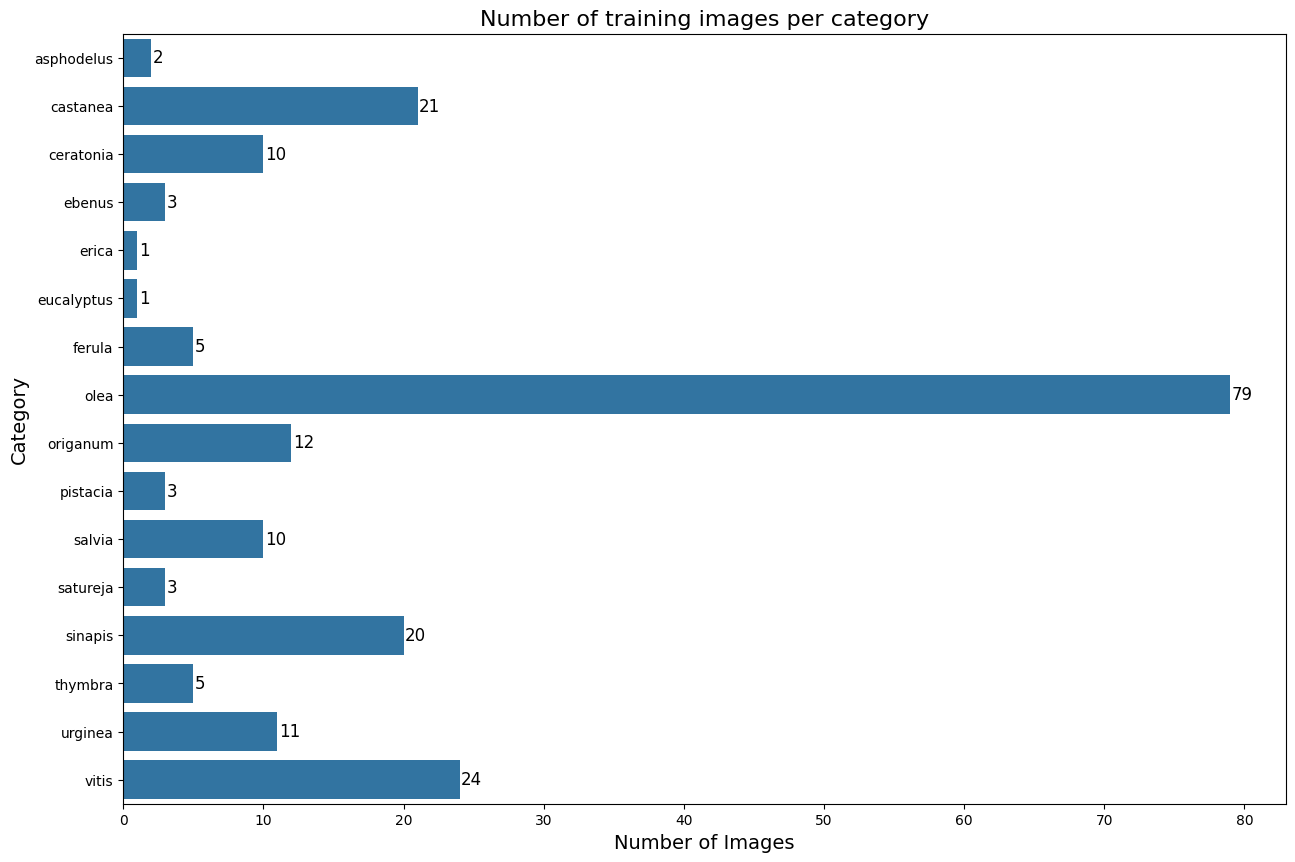

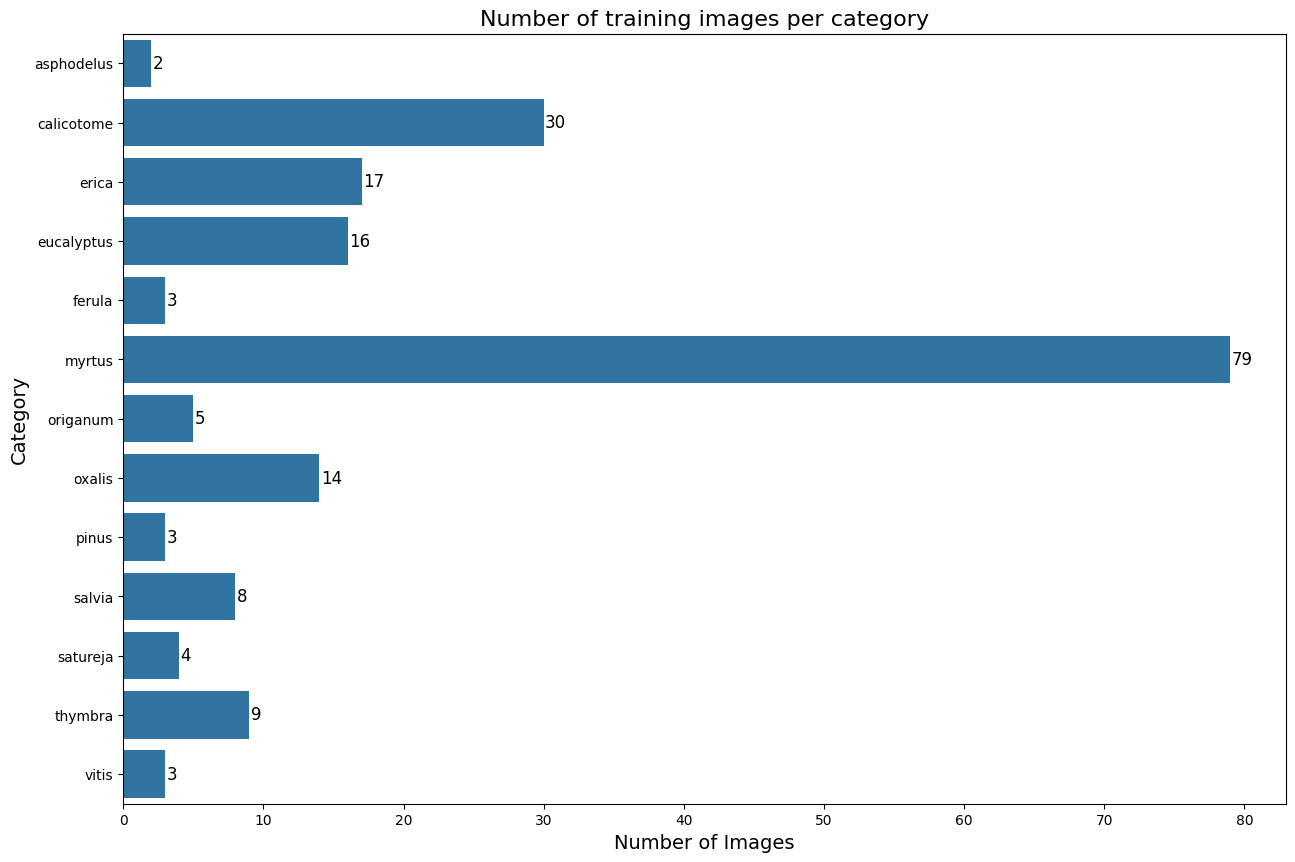

In [7]:
for view in ["EQUATORIAL", "POLAR"]:
    print(f"{view} directory: {f'{path_data}/{view}'}")
    view_path=f"{path_data}/{view}"
    _, img_pr_cat=graph_img_cat(view_path)
    print(img_pr_cat)